## Final Project Submission

Please fill out:
* Student name: BERYL AGAI
* Student pace: self paced / part time / full time  FULL TIME
* Scheduled project review date/time: 
* Instructor name: ASHA DEEN
* Blog post URL:


# PICTURE PERFECT:BOX OFFICE INSIGHTS FOR MICROSOFT'S MOVIE STUDIO LAUNCH

## Author: [Beryl Agai](https://github.com/dashboard)

## BUSINESS PROBLEM

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

## OVERVIEW

##### Microsoft's objective 
To create a new movie studio.

##### Microsoft's challenge
They know nothing about creating movies.

##### Microsoft's expectation of this project:
- Explore type of films currently doing the best at the box office.


- Translate these findings into actionable insights.


- Insights to help them decide what type of films to create.

## PROJECT GOAL

To explore what types of films are currently doing the best at the box office then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## DATA SOURCE

In the folder zippedData are movie datasets from:

- Box Office Mojo.


- IMDB.


- Rotten Tomatoes.


- TheMovieDB.


- The Numbers.

## BUSINESS PROBLEM UNDERSTANDING

The questions this project aims to answer are:

- What is the distribution of movies by genre and what are the top 5 genres based on average rating?



- What is the relationship between budget and net gross earning?



- What is the relationship between runtime and top net grossing movies?




- What is the distribution of genre based on net gross earnings?




##  1) IMPORTING THE NECESSARY MODULES


The first step is to import the modules neeeded for this project.

In [44]:
import csv

import numpy as np

import pandas as pd

import seaborn as sns

import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3

from zipfile import ZipFile 


#  2) READING THE FILES



##  i) Reading the csv and tsv  files

Next,I read  the files found in the `zippedData` file so as to have a visual of my data.

The files are:

- `zippedData/bom.movie_gross.csv.gz` which is from Box Office Mojo.


- `zippedData/rt.movie_info.tsv.gz` which is from Rotten Tomatoes.


- `zippedData/rt.reviews.tsv.gz` which is from Rotten Tomatoes.


- `zippedData/tn.movie_budgets.csv` which is from The Numbers.


- `zippedData/tmdb.movies.csv.gz` which is from The Movie Database.




To ensure my output format was  in one line ,I used the pandas function <span style='color:red'>pd.set_option('display.expand_frame_repr', False)</span> 

In [12]:
#Reading the movie_gross file

df_movie_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_movie_gross,' ')

                                            title      studio  domestic_gross foreign_gross  year
0                                     Toy Story 3          BV     415000000.0     652000000  2010
1                      Alice in Wonderland (2010)          BV     334200000.0     691300000  2010
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0     664300000  2010
3                                       Inception          WB     292600000.0     535700000  2010
4                             Shrek Forever After        P/DW     238700000.0     513900000  2010
...                                           ...         ...             ...           ...   ...
3382                                    The Quake       Magn.          6200.0           NaN  2018
3383                  Edward II (2018 re-release)          FM          4800.0           NaN  2018
3384                                     El Pacto        Sony          2500.0           NaN  2018
3385                

In [5]:
#Reading the movie_info  file

df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_movie_info)

        id                                           synopsis rating                                              genre            director                                            writer  theater_date      dvd_date currency  box_office      runtime             studio
0        1  This gritty, fast-paced, and innovative police...      R                Action and Adventure|Classics|Drama    William Friedkin                                    Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN         NaN  104 minutes                NaN
1        3  New York City, not-too-distant-future: Eric Pa...      R                  Drama|Science Fiction and Fantasy    David Cronenberg                      David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $     600,000  108 minutes  Entertainment One
2        5  Illeana Douglas delivers a superb performance ...      R                  Drama|Musical and Performing Arts      Allison Anders                                    Allison Ande

In [13]:
#Reading_movie_reviews file

df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',  encoding='latin1')

pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_reviews)

         id                                             review rating   fresh             critic  top_critic         publisher                date
0         3  A distinctly gallows take on contemporary fina...    3/5   fresh         PJ Nabarro           0   Patrick Nabarro   November 10, 2018
1         3  It's an allegory in search of a meaning that n...    NaN  rotten     Annalee Newitz           0           io9.com        May 23, 2018
2         3  ... life lived in a bubble in financial dealin...    NaN   fresh       Sean Axmaker           0  Stream on Demand     January 4, 2018
3         3  Continuing along a line introduced in last yea...    NaN   fresh      Daniel Kasman           0              MUBI   November 16, 2017
4         3             ... a perverse twist on neorealism...     NaN   fresh                NaN           0      Cinema Scope    October 12, 2017
...     ...                                                ...    ...     ...                ...         ...          

In [7]:
#Reading movie_budgets file

df_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_movie_budgets)

      id  release_date                                        movie production_budget domestic_gross worldwide_gross
0      1  Dec 18, 2009                                       Avatar      $425,000,000   $760,507,625  $2,776,345,279
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides      $410,600,000   $241,063,875  $1,045,663,875
2      3   Jun 7, 2019                                 Dark Phoenix      $350,000,000    $42,762,350    $149,762,350
3      4   May 1, 2015                      Avengers: Age of Ultron      $330,600,000   $459,005,868  $1,403,013,963
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi      $317,000,000   $620,181,382  $1,316,721,747
...   ..           ...                                          ...               ...            ...             ...
5777  78  Dec 31, 2018                                       Red 11            $7,000             $0              $0
5778  79   Apr 2, 1999                                    Follow

In [8]:
#Reading tmdb_movies

df_tmdb_movies=pd.read_csv('zippedData/tmdb.movies.csv.gz')

pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_tmdb_movies)

       Unnamed: 0            genre_ids      id original_language                                original_title  popularity release_date                                         title  vote_average  vote_count
0               0      [12, 14, 10751]   12444                en  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19  Harry Potter and the Deathly Hallows: Part 1           7.7       10788
1               1  [14, 12, 16, 10751]   10191                en                      How to Train Your Dragon      28.734   2010-03-26                      How to Train Your Dragon           7.7        7610
2               2        [12, 28, 878]   10138                en                                    Iron Man 2      28.515   2010-05-07                                    Iron Man 2           6.8       12368
3               3      [16, 35, 10751]     862                en                                     Toy Story      28.005   1995-11-22                                 

## ii)  Reading the SQL Tables

The three SQL tables from the file `zippedData\im.db\im.db` that  I will be using to analyze the data are as shown below:

- `movie_basics`


- `movie_ratings`


- `movie_akas`

In [49]:
#I extacted the im.db zip file from ZIP Archive and ran it

# Connect to the extracted SQLite database
conn = sqlite3.connect('im.db')
cur = conn.cursor()



In [59]:
df_basics=pd.read_sql('''
SELECT * 

FROM movie_basics;

''',conn)

df_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [60]:
df_ratings=pd.read_sql('''
SELECT * 

FROM movie_ratings;

''',conn)

df_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [61]:
df_akas=pd.read_sql('''
SELECT * 

FROM movie_akas;

''',conn)

df_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


We are now going to address each problem individually while cleaning the data,doing exploratory data analysis,curating visualizations and coming up with conclusions.

### QUESTION 1:What is the distribution of movies by genre and what are the top 5 genres based on average rating?

I will be using the im.db data.

I start by joining the two tables movie_basics and movie_ratings using the primary key movie_id.

I convert it into a pandas dataframe.


In [62]:
#Joining the two tables movie_basics and movie_ratings

df_basics_ratings=pd.read_sql('''
SELECT *,

movie_ratings.movie_id

FROM movie_basics

JOIN movie_ratings

    USING(movie_id)
    
WHERE genres is not null
    
GROUP BY genres

ORDER BY averagerating DESC

;

''',conn)

df_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25,tt1740810
1,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22,tt10146728
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5,tt4135932
3,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19,tt3856476
4,tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,"History,Sport",9.2,5,tt5903964
...,...,...,...,...,...,...,...,...,...
918,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,tt0249516
919,tt0937353,The Devil's Flower,Tsvetok dyavola,2010,90.0,"Mystery,Romance",1.7,201,tt0937353
920,tt5161302,Eyal Hirrifah,Eyal Hirrifah,2015,101.0,"Comedy,Musical,Sport",1.4,28,tt5161302
921,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33,tt1865374


### Descriptive analysis of this data

I will be getting more information about this data set'

In [87]:
df_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         923 non-null    object 
 1   primary_title    923 non-null    object 
 2   original_title   923 non-null    object 
 3   start_year       923 non-null    int64  
 4   runtime_minutes  860 non-null    float64
 5   genres           923 non-null    object 
 6   averagerating    923 non-null    float64
 7   numvotes         923 non-null    int64  
 8   movie_id         923 non-null    object 
 9   genre1           923 non-null    object 
 10  genre2           899 non-null    object 
 11  genre3           714 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 86.7+ KB


In [96]:
df_basics_ratings.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,923.000000,860.000000,923.000000,9.230000e+02
mean,2012.698808,94.212791,6.270314,1.515586e+04
std,2.657260,23.705902,1.457112,7.165421e+04
min,2010.000000,8.000000,1.100000,5.000000e+00
25%,2010.000000,82.000000,5.400000,1.700000e+01
50%,2012.000000,91.000000,6.400000,7.900000e+01
75%,2014.000000,105.000000,7.250000,7.410000e+02
max,2019.000000,272.000000,9.700000,1.299334e+06


In [97]:
df_basics_ratings.isna().sum()

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes     63
genres               0
averagerating        0
numvotes             0
movie_id             0
genre1               0
genre2              24
genre3             209
dtype: int64

From the operations above,we observe that:

This is a dataframe with 923 rows and 12 columns.

There are null values in columns runtime_minutes,genre2 and genre3 

The datatypes are 2 floats,2 integers and 8 objects.

### Data cleaning

Each movie has between 1 to 3 genres listed in their genre value. I plan to split the genre into 3 columns (genre1, genre2, genre3). Then I will create 3 different dataframes with each containing only one genre column.This way,each genre is represented. Then I will concatenate all 3 dataframes to combine the genre columns which will create 1 dataframe with 1 genre column having only 1 genre listed per entry.

Using .apply(), I used a lambda function to split up the genre values into 3 separate values while adding them into 3 separate columns.



In [65]:
#split up the genre values into 3 separate values

df_basics_ratings[['genre1', 'genre2', 'genre3']] = df_basics_ratings["genres"].apply(lambda x: pd.Series(str(x).split(",")))
df_basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genre1,genre2,genre3
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25,tt1740810,Documentary,Family,Romance
1,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22,tt10146728,Comedy,Documentary,Sport
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5,tt4135932,Comedy,Documentary,Fantasy
3,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19,tt3856476,Documentary,Family,Musical
4,tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,"History,Sport",9.2,5,tt5903964,History,Sport,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
918,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,tt0249516,Action,Animation,Comedy
919,tt0937353,The Devil's Flower,Tsvetok dyavola,2010,90.0,"Mystery,Romance",1.7,201,tt0937353,Mystery,Romance,NaN
920,tt5161302,Eyal Hirrifah,Eyal Hirrifah,2015,101.0,"Comedy,Musical,Sport",1.4,28,tt5161302,Comedy,Musical,Sport
921,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33,tt1865374,Action,Biography,History



Next,I  concatenated the  3 dataframes(genre1,genre2,genre3) to make 1 dataframe with 1 genre column containing all genres .

This makes it easy to see which movie belongs to which particular genre,as opposed to how it was before where each movie had a cluster of genres.

For the new genre dataframes, I dropped 2 genre columns from each of these leaving each one with a unique genre column. From there I concatenated all the genre dataframes into one main dataframe (genres).

No data was lost in this process as shown in the code below.


In [66]:
#concatenate the  3 dataframes(genre1,genre2,genre3) to make 1 dataframe

genres1= df_basics_ratings.drop(columns=["genres", "genre2","genre3"])
genres2= df_basics_ratings.drop(columns=["genres", "genre1","genre3"])
genres3= df_basics_ratings.drop(columns=["genres", "genre1","genre2"])

genres1= genres1.rename(columns = {"genre1":"genre"})
genres2= genres2.rename(columns = {"genre2":"genre"})
genres3= genres3.rename(columns = {"genre3":"genre"})

genres_12= pd.concat([genres1, genres2])
genres= pd.concat([genres_12, genres3])
genres.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genre
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,9.7,25,tt1740810,Documentary
1,tt10146728,Foosballers,Foosballers,2019,NaN,9.7,22,tt10146728,Comedy
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,9.4,5,tt4135932,Comedy
3,tt3856476,Sunakali,Sunakali,2017,59.0,9.3,19,tt3856476,Documentary
4,tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,9.2,5,tt5903964,History


When joining the tables,I had already grouped by averagerating in descending order.

Next,I drop all rows with  null values since movies with 0 ratings is not what our client needs to make an informed decision.

In [86]:
#Dropping rows with NaN and grouping by averagerating
genres= genres.dropna()
genres['averagerating']= genres['averagerating']
genres_grouped= genres.groupby('genre')

genres_grouped.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genre
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,9.7,25,tt1740810,Documentary
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,9.4,5,tt4135932,Comedy
3,tt3856476,Sunakali,Sunakali,2017,59.0,9.3,19,tt3856476,Documentary
5,tt10156610,Ratne Price Sa Kosara,Ratne Price Sa Kosara,2019,107.0,9.2,29,tt10156610,Documentary
7,tt1550623,Sweet Science,Sweet Science,2010,118.0,9.2,8,tt1550623,Action
...,...,...,...,...,...,...,...,...,...
237,tt1548927,Chasing the Dream,Chasing the Dream,2010,43.0,7.2,6,tt1548927,Reality-TV
317,tt4870190,League of Exotique Dancers,League of Exotique Dancers,2015,90.0,6.9,29,tt4870190,Reality-TV
346,tt6511076,One Plus One Makes a Pharaoh's Chocolate Cake,One Plus One Makes a Pharaoh's Chocolate Cake,2017,37.0,6.8,6,tt6511076,Reality-TV
697,tt2076157,Beauty Beneath the Dirt,Beauty Beneath the Dirt,2012,69.0,5.4,30,tt2076157,Reality-TV


### Visualization

To view which genre is most popular based on averagerating,I will be using three visualization tools:

- A vertical bar graph.


- A horizontal bar graph


- A scatter plot.


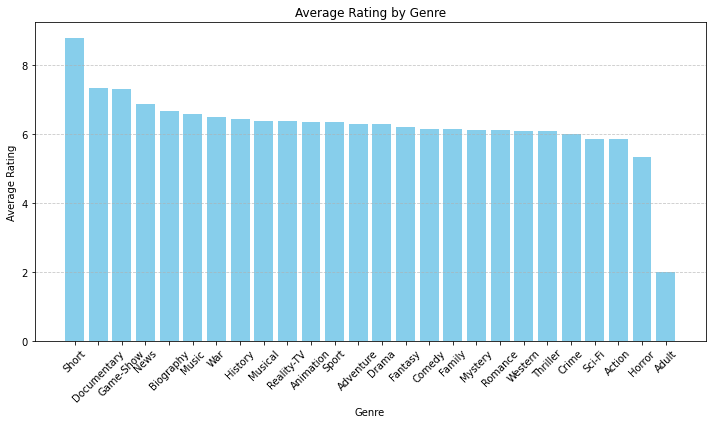

In [92]:
# Group by 'genre' and calculate the average rating for each genre
genres_grouped_rating = genres_grouped['averagerating'].mean().reset_index()

genres_grouped_rating = genres_grouped_rating.sort_values(by='averagerating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genres_grouped_rating['genre'], genres_grouped_rating['averagerating'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

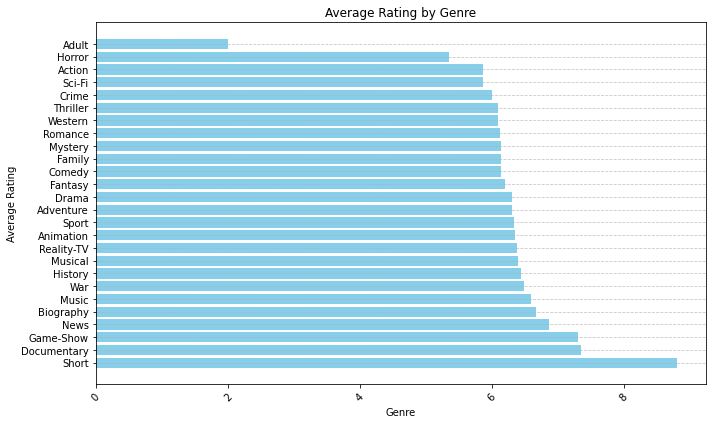

In [93]:
genres_grouped_rating = genres_grouped['averagerating'].mean().reset_index()

genres_grouped_rating = genres_grouped_rating.sort_values(by='averagerating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(genres_grouped_rating['genre'], genres_grouped_rating['averagerating'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

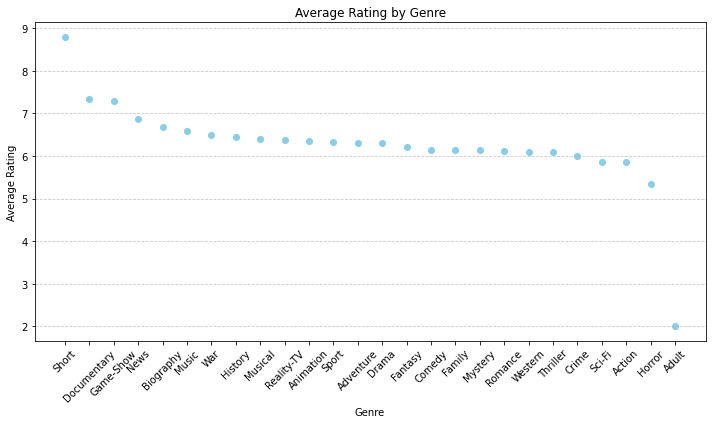

In [95]:
genres_grouped_rating = genres_grouped['averagerating'].mean().reset_index()

genres_grouped_rating = genres_grouped_rating.sort_values(by='averagerating', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(genres_grouped_rating['genre'], genres_grouped_rating['averagerating'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Observations 

The top 5 well rated genres are:

- Short

- Documentary

- Game shows

- News

- Biography

Most genres are loved,but there is still a top 5 list.

Consumer opinion is very vital because the consumers are the ones watching the movies and  their genre preference should be considered by Microsoft.

#### Recommendation 

Microsoft should invest in a variety of genres since most of them dont have a huge deviation in terms of rating,but their main focus should be on the above listed top 5 genres.

### QUESTION 2:What is the relationship between budget and net gross earning?

I have decided to forgo using the Box Office Mojo data set and will be using the The Numbers data set and the IMBD data set. While Box Office Mojo had relevant information on gross earings, it lacked production budget which is needed for further analysis of overall net gross earnings. The Numbers data set contains both production budget and worldwide gross for the movies, while the IMDB data set contains genres and the runtimes of the movies. These data sets will be combined to look at our variables of budget, runtime, and genre when compared to net gross earnings.

In [100]:
#Lets preview The Numbers dataset once more

df_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

pd.set_option('display.expand_frame_repr', False)  #This is to to prevent pandas from wrapping the table output and display it in one line

print(df_movie_budgets)

      id  release_date                                        movie production_budget domestic_gross worldwide_gross
0      1  Dec 18, 2009                                       Avatar      $425,000,000   $760,507,625  $2,776,345,279
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides      $410,600,000   $241,063,875  $1,045,663,875
2      3   Jun 7, 2019                                 Dark Phoenix      $350,000,000    $42,762,350    $149,762,350
3      4   May 1, 2015                      Avengers: Age of Ultron      $330,600,000   $459,005,868  $1,403,013,963
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi      $317,000,000   $620,181,382  $1,316,721,747
...   ..           ...                                          ...               ...            ...             ...
5777  78  Dec 31, 2018                                       Red 11            $7,000             $0              $0
5778  79   Apr 2, 1999                                    Follow

In [109]:
#Reformatting values for domestic gross, worldwide_gross and production_budget
df_movie_budgets['worldwide_gross'] = df_movie_budgets['worldwide_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
df_movie_budgets['domestic_gross'] = df_movie_budgets['domestic_gross'].apply(
    lambda x: int(x.replace('$','').replace(',','')))
df_movie_budgets['production_budget'] = df_movie_budgets['production_budget'].apply(
    lambda x: int(x.replace('$','').replace(',','')))



AttributeError: 'int' object has no attribute 'replace'

In [106]:
df_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


### Descriptive Analysis

To gain further view into the structure and contant of the  dataset,we are gonna use .info() and .describe()

In [111]:
df_movie_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [112]:
df_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [114]:
df_movie_budgets[df_movie_budgets.duplicated()]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


### Data cleaning

From the descriptive analysis done above,it is safe to say that:

- The dataset has 5782 rows and 6 columns.

- It has no visible outliers.

- Has no duplicates

In [115]:
# dropping rows with 0 values for budget and gross columns
df_movie_budgets_cleaned = df_movie_budgets.loc[(df_movie_budgets.domestic_gross != 0) 
                                       &(df_movie_budgets.worldwide_gross != 0) 
                                       &(df_movie_budgets.production_budget != 0)]

df_movie_budgets_cleaned

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


To clean the data set as shown above, I utilized the .loc to obtain all rows that do not have a 0 value in the domestic gross, worldwide gross and budget columns. I created a new dataframe to house this cleaned data set.

In [116]:
#Making a new column for Net gross earning (worldwide gross- production budget) and sorting by Net_gross

df_movie_budgets_cleaned['Net_Gross']= df_movie_budgets_cleaned['worldwide_gross'] - df_movie_budgets_cleaned['production_budget']
top_gross_movies= df_movie_budgets_cleaned.sort_values("Net_Gross", ascending = False)

#Previewing Top Grossing movies
top_gross_movies.head(10)

<ipython-input-116-f470a485fa44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_budgets_cleaned['Net_Gross']= df_movie_budgets_cleaned['worldwide_gross'] - df_movie_budgets_cleaned['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799


Next I created a new column for my success metric of Total Net Gross earnings. This is calculated by calculating the difference between worldwide gross and production budget. The data set was then sorted by net gross to review the top 10 highest net grossing movies and to make visuals more legible, additional columns will be created for production budget and net gross to have values by the millions

Text(0.5, 1.0, 'Distribution of Films by Total Net Gross Earnings')

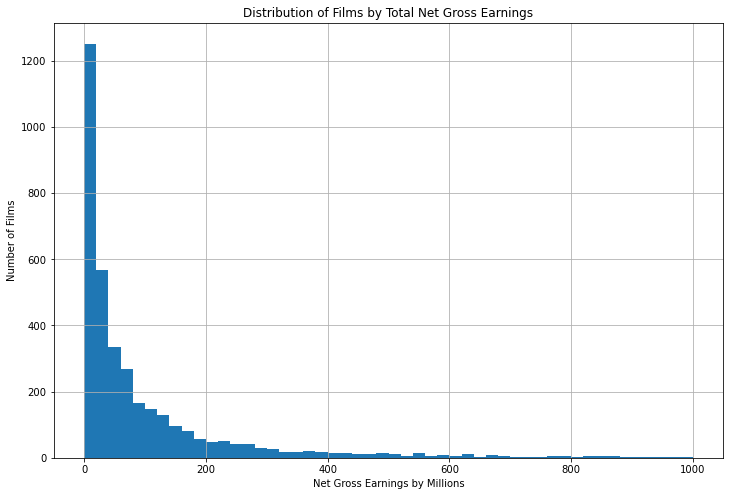

In [118]:
#Adding columns adjusting budget and gross to millions
top_gross_movies['budget_millions']= (top_gross_movies["production_budget"]/1000000)
top_gross_movies['Net_gross_millions']=(top_gross_movies["Net_Gross"]/1000000)

plt= top_gross_movies.Net_gross_millions.hist(figsize=(12,8), bins= 50, range = [0,1000])
plt.set_ylabel("Number of Films")
plt.set_xlabel("Net Gross Earnings by Millions")
plt.set_title("Distribution of Films by Total Net Gross Earnings")

Observing this,we can see that the distribution is positively skewed. A majority of the films fall between 0 and 200 million dollars for total net gross earnings.

Next,I will be looking into IMDB dataset and merge this data set with the top grossing movies to get a combined data set with production budget, worldwide gross, net gross, run time and genres.

Then using .rename(), I will rename the column name "primary_title" to "movie". This is so that there would be a common column name ("movie") to merge the Numbers dataframe to the IMDB data frame.

Check below.

In [123]:
#dropping nulls and renaming title to movie to merge with top grossing movies df
df_basics_ratings= df_basics_ratings.dropna()
df_basics_ratings= df_basics_ratings.rename(columns= {"primary_title": "movie"})

In [124]:
#merging dataframes
top_movies_all = pd.merge(top_gross_movies, df_basics_ratings, how = "left", on= ["movie"])
top_movies_all.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genre1,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,425.0,2351.345279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,200.0,2008.208395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,300.0,1748.134200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,306.0,1747.311220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,215.0,1433.854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,tt0369610,Action,Adventure,Sci-Fi
5,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,190.0,1328.722794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,225.0,1292.935897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,125.0,1216.693157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,200.0,1148.258224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,170.0,1135.772799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
top_movies_all = top_movies_all.dropna(axis=1, how='all')
top_movies_all


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genre1,genre2,genre3
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,425.0,2351.345279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,200.0,2008.208395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,300.0,1748.134200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,306.0,1747.311220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,215.0,1433.854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,tt0369610,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5229,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,100.0,-92.905005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5230,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,105.0,-94.635231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5231,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,110.0,-106.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5232,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,150.0,-110.450242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#Checking info 
top_movies_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5233
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5234 non-null   int64  
 1   release_date        5234 non-null   object 
 2   movie               5234 non-null   object 
 3   production_budget   5234 non-null   int64  
 4   domestic_gross      5234 non-null   int64  
 5   worldwide_gross     5234 non-null   int64  
 6   Net_Gross           5234 non-null   int64  
 7   budget_millions     5234 non-null   float64
 8   Net_gross_millions  5234 non-null   float64
 9   movie_id            81 non-null     object 
 10  original_title      81 non-null     object 
 11  start_year          81 non-null     float64
 12  runtime_minutes     81 non-null     float64
 13  genres              81 non-null     object 
 14  averagerating       81 non-null     float64
 15  numvotes            81 non-null     float64
 16  movie_

In [128]:
#dropping any duplicate movies and also dropping NaNs
top_movies_all= top_movies_all.drop_duplicates(subset= ['movie'])
top_movies_dropped_null= top_movies_all.dropna()
top_movies_dropped_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 4 to 5223
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  79 non-null     int64  
 1   release_date        79 non-null     object 
 2   movie               79 non-null     object 
 3   production_budget   79 non-null     int64  
 4   domestic_gross      79 non-null     int64  
 5   worldwide_gross     79 non-null     int64  
 6   Net_Gross           79 non-null     int64  
 7   budget_millions     79 non-null     float64
 8   Net_gross_millions  79 non-null     float64
 9   movie_id            79 non-null     object 
 10  original_title      79 non-null     object 
 11  start_year          79 non-null     float64
 12  runtime_minutes     79 non-null     float64
 13  genres              79 non-null     object 
 14  averagerating       79 non-null     float64
 15  numvotes            79 non-null     float64
 16  movie_id

Text(0.5, 1.0, 'Distribution of Films by Total Net Gross Earnings')

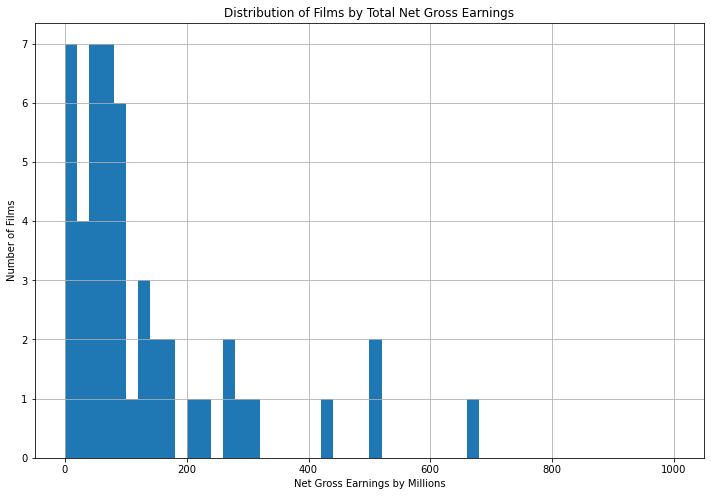

In [129]:
plt= top_movies_dropped_null.Net_gross_millions.hist(figsize=(12,8), bins= 50, range = [0,1000])
plt.set_ylabel("Number of Films")
plt.set_xlabel("Net Gross Earnings by Millions")
plt.set_title("Distribution of Films by Total Net Gross Earnings")

The distribution of this set is positively skewed with most movies having net gross earnings of between 0 to 200 million.

Next ,Using a bar chart, I have plotted the top 10 highest net grossing movies with the plot showing the value for total net gross along side the films production budget. 



<ipython-input-131-db77d2280160>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_movies_gross['movie']= top10_movies_gross['movie'].replace({'Harry Potter and the Deathly Hallows: Part II': 'Harry Potter: Deathly Hallows II'})


Text(0.5, 1.0, 'Top 10 Highest Net Grossing Movies')

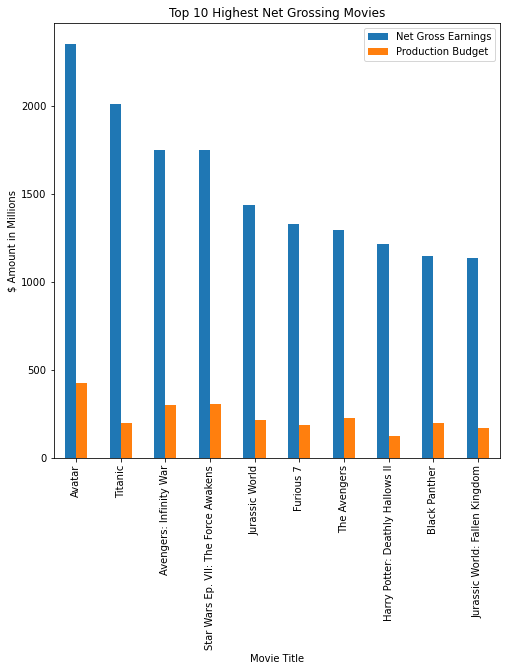

In [131]:
top10_movies_gross = top_gross_movies.head(10)
top10_movies_gross['movie']= top10_movies_gross['movie'].replace({'Harry Potter and the Deathly Hallows: Part II': 'Harry Potter: Deathly Hallows II'})

plt= top10_movies_gross.plot(
    x="movie", y=["Net_gross_millions", "budget_millions"], kind="bar", figsize= (8,8))

plt.set_xlabel("Movie Title")
plt.set_ylabel("$ Amount in Millions")
plt.legend(["Net Gross Earnings", "Production Budget"])
plt.set_title("Top 10 Highest Net Grossing Movies")

Avatar was the highest net grossing movies and the rest are as depicted above.

In [132]:
#checking correlation between movie budget and net gross
top_gross_movies["production_budget"].corr(top_gross_movies["Net_Gross"])

0.605544253487369

This is a strong positive correltion meaning that production budget has a strong positive effect on net gross earnings.

In [133]:
#getting statistic calculations
top_gross_movies.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5234.0,5.034658e+01,2.884867e+01,1.000000e+00,2.500000e+01,5.000000e+01,7.500000e+01,1.000000e+02
production_budget,5234.0,3.403348e+07,4.296048e+07,1.100000e+03,6.500000e+06,2.000000e+07,4.500000e+07,4.250000e+08
domestic_gross,5234.0,4.625747e+07,7.029651e+07,3.880000e+02,4.289718e+06,2.198422e+07,5.756598e+07,9.366622e+08
worldwide_gross,5234.0,1.007615e+08,1.811226e+08,4.010000e+02,8.142571e+06,3.543844e+07,1.093357e+08,2.776345e+09
Net_Gross,5234.0,6.672803e+07,1.518522e+08,-2.002376e+08,-1.396634e+06,1.357260e+07,7.088258e+07,2.351345e+09
budget_millions,5234.0,3.403348e+01,4.296048e+01,1.100000e-03,6.500000e+00,2.000000e+01,4.500000e+01,4.250000e+02
Net_gross_millions,5234.0,6.672803e+01,1.518522e+02,-2.002377e+02,-1.396634e+00,1.357260e+01,7.088258e+01,2.351345e+03


In [135]:
#finding out the average production budget for films in millions
print((top_gross_movies["production_budget"].mean())/1000000)

#finding avg net gross for films in millions
print((top_gross_movies["Net_Gross"].mean())/1000000)

34.03348004948414
66.72802610546427


In [136]:
#finding budget for top 100 grossing films in millions
top100_gross_movies = top_gross_movies.head(100)
print((top100_gross_movies["production_budget"].mean())/1000000)

#finding avg net gross for top 100 grossing films in millions
print((top100_gross_movies["Net_Gross"].mean())/1000000)

159.522
850.39601654


### Observation

When it comes average production budget vs average net gross, the average production budget for a film is roughly 34 million dollars and the average net gross earnings is 66 million dollars. The median production budget is roughly 20 million dollars while the median net gross is ~15 million. Looking at the top 100 grossing movies, the average production budget for those films is roughly 159-160 million dollars and the average net gross earnings is 850 million dollars. 



### Recommendation

While the average production budget of 34 million can return a profit, if looking for a higher net gross profit I would recommend planning for a budget near 160 million dollars

### QUESTION 3:What is the relationship between runtime and top net grossing movies?

We will continue with the data that we used for the question above,so this is a continuation of the work above.

First,I will check the distribution of runtimes,so as to see what run time is favored by movies

### Visualization

I will be using several visualization tools.


Text(0.5, 1.0, 'Distribution of Films by Runtime')

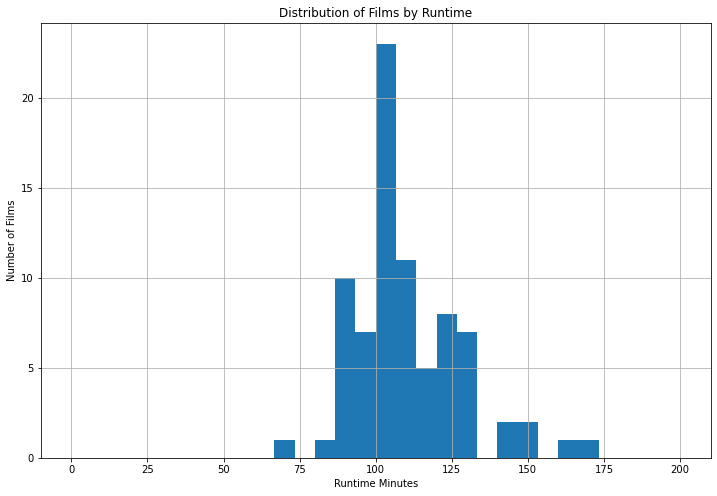

In [137]:
plt= top_movies_dropped_null.runtime_minutes.hist(figsize=(12,8), bins= 30, range = [0,200])
plt.set_ylabel("Number of Films")
plt.set_xlabel("Runtime Minutes")
plt.set_title("Distribution of Films by Runtime")

The average runtime is approximately 110 minutes.

Next,I will look the run time of the top 15 favorite movies using a bargraph 



Text(0.5, 1.0, 'Runtime and Net Gross Per Movie')

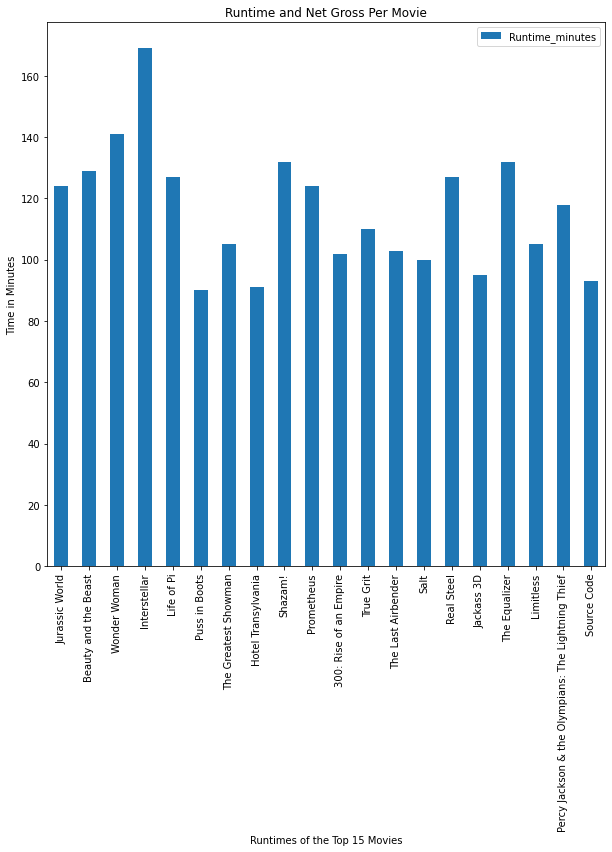

In [138]:
#bar graph of the top 15 grossing movies and runtime
top15_movies_runtime= top_movies_dropped_null.head(20)
plt= top15_movies_runtime.plot(
    x="movie", y="runtime_minutes", kind="bar", figsize = (10,10))
plt.set_xlabel("Runtimes of the Top 15 Movies")
plt.set_ylabel("Time in Minutes")
plt.legend(["Runtime_minutes"])
plt.set_title("Runtime and Net Gross Per Movie")

<AxesSubplot:xlabel='runtime_minutes', ylabel='Net_gross_millions'>

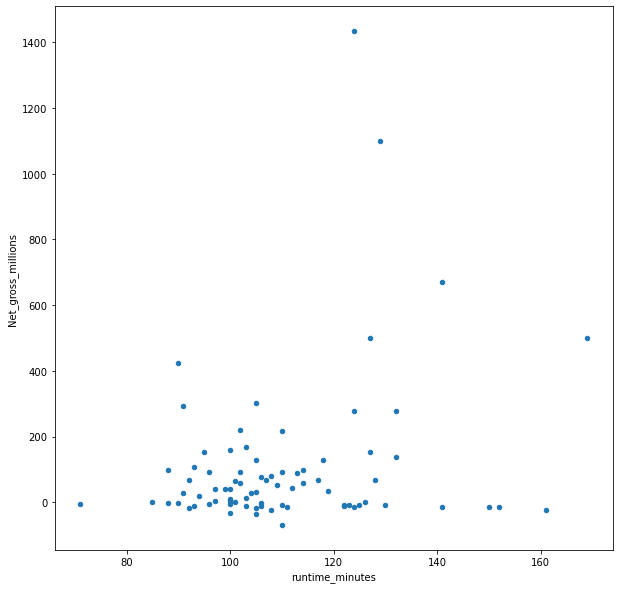

In [139]:
#scatter plot 
top_movies_dropped_null.plot(
    x="runtime_minutes", y= "Net_gross_millions", kind="scatter", figsize = (10,10))

In [140]:
#running correlation of runtime to net gross
top_movies_dropped_null["runtime_minutes"].corr(top_movies_dropped_null["Net_Gross"])

0.25549751562166084

Runtime and net gross have a weak positive relation meaning that a change in one does  not affect the other significantly

In [142]:
#Need to calculate average runtime and average gross to give recs
top100_movies_rt= top_movies_dropped_null.head(100)
print("Overall, the average runtime for a movie is", 
      round(top_movies_dropped_null["runtime_minutes"].mean()),
      "minutes.")
print("When looking at the top 100 highest net grossing movies, the average runtime is", 
      round(top100_movies_rt["runtime_minutes"].mean()),
      "minutes.")
print("If we look even closer at the top 15, the average runtime is", 
      round(top15_movies_runtime["runtime_minutes"].mean()),
      "minutes.")

Overall, the average runtime for a movie is 110 minutes.
When looking at the top 100 highest net grossing movies, the average runtime is 110 minutes.
If we look even closer at the top 15, the average runtime is 116 minutes.


### Observations 

Runtime and net gross have a weak positive relation meaning that a change in one does  not affect the other significantly.

The average run time is 110 times for the whole dataset.

The average for the top 100 movies is 110 minutes and when we narrow it even further to the top 15,the avearge is 116 minutes.


### Recommendations

The recommended run time would be between 110 to 120 minutes.

## 4)What is the distribution of genre based on net gross earnings?

Each movie has between 1 to 3 genres listed in their genre value. I plan to split the genre into 3 columns (genre1, genre2, genre3). Then I will create 3 different dataframes with each containing only one genre column. Then I will concatenate all 3 dataframes to combine the genre columns which will create 1 dataframe with 1 genre column having only 1 genre listed per entry.

In [154]:
# Each movie has 1 up to 3 genres listed  so we separate them.

top_movies_dropped_null[['genre1', 'genre2', 'genre3']] = top_movies_dropped_null["genres"].apply(lambda x: pd.Series(str(x).split(",")))
top_movies_dropped_null.head()

C:\Users\Admin\Anacondaaa\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie_id,genre1,genre2,genre3
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,215.0,1433.854864,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,tt0369610,Action,Adventure,Sci-Fi
11,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,160.0,1099.199706,tt2771200,Beauty and the Beast,2017.0,129.0,"Family,Fantasy,Musical",7.2,238325.0,tt2771200,Family,Fantasy,Musical
70,55,"Jun 2, 2017",Wonder Woman,150000000,412563408,821133378,671133378,150.0,671.133378,tt0451279,Wonder Woman,2017.0,141.0,"Action,Adventure,Fantasy",7.5,487527.0,tt0451279,Action,Adventure,Fantasy
134,32,"Nov 5, 2014",Interstellar,165000000,188017894,666379375,501379375,165.0,501.379375,tt0816692,Interstellar,2014.0,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334.0,tt0816692,Adventure,Drama,Sci-Fi
135,88,"Nov 21, 2012",Life of Pi,120000000,124987022,620912003,500912003,120.0,500.912003,tt0454876,Life of Pi,2012.0,127.0,"Adventure,Drama,Fantasy",7.9,535836.0,tt0454876,Adventure,Drama,Fantasy


Next,I concatenated the 3 dataframes(genre1,genre2,genre3) to make 1 dataframe with 1 genre column containing all genres .

This makes it easy to see which movie belongs to which particular genre,as opposed to how it was before where each movie had a cluster of genres.

For the new genre dataframes, I dropped 2 genre columns from each of these leaving each one with a unique genre column. From there I concatenated all the genre dataframes into one main dataframe (genres).

No data was lost in this process as shown in the code below.

In [147]:
# concatenate genre1,genre2 and genre3 into one dataframe called genre

genres1= top_movies_dropped_null.drop(columns=["genres", "genre2","genre3"])
genres2= top_movies_dropped_null.drop(columns=["genres", "genre1","genre3"])
genres3= top_movies_dropped_null.drop(columns=["genres", "genre1","genre2"])

genres1= genres1.rename(columns = {"genre1":"genre"})
genres2= genres2.rename(columns = {"genre2":"genre"})
genres3= genres3.rename(columns = {"genre3":"genre"})

genres_12= pd.concat([genres1, genres2])
genres= pd.concat([genres_12, genres3])
genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Net_Gross,budget_millions,Net_gross_millions,movie_id,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genre
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,215.0,1433.854864,tt0369610,Jurassic World,2015.0,124.0,7.0,539338.0,tt0369610,Action
11,35,"Mar 17, 2017",Beauty and the Beast,160000000,504014165,1259199706,1099199706,160.0,1099.199706,tt2771200,Beauty and the Beast,2017.0,129.0,7.2,238325.0,tt2771200,Family
70,55,"Jun 2, 2017",Wonder Woman,150000000,412563408,821133378,671133378,150.0,671.133378,tt0451279,Wonder Woman,2017.0,141.0,7.5,487527.0,tt0451279,Action
134,32,"Nov 5, 2014",Interstellar,165000000,188017894,666379375,501379375,165.0,501.379375,tt0816692,Interstellar,2014.0,169.0,8.6,1299334.0,tt0816692,Adventure
135,88,"Nov 21, 2012",Life of Pi,120000000,124987022,620912003,500912003,120.0,500.912003,tt0454876,Life of Pi,2012.0,127.0,7.9,535836.0,tt0454876,Adventure


In [148]:
#Dropping NaN and grouping by genre aggragting Net gross mean and max
genres= genres.dropna()
genres["Net_Gross"]= genres["Net_Gross"]/1000000
genres_grouped= genres.groupby("genre").agg({'Net_Gross': ['mean','max']})

genres_grouped= genres_grouped.reset_index()
genres_grouped.head(10)

genre   Net_Gross             
                      mean          max
0       Action  150.102760  1433.854864
1    Adventure  187.844713  1433.854864
2    Animation  359.246645   424.987477
3    Biography   43.303862   302.665550
4       Comedy   64.974848   293.505812
5        Crime   26.120296   137.903624
6  Documentary  151.685793   151.685793
7        Drama   71.484885   501.379375
8       Family  122.758533  1099.199706
9      Fantasy  160.379666  1099.199706

In [149]:
#sorting by Net Gross mean
genres_grouped= genres_grouped.sort_values(("Net_Gross","mean"), ascending= False)

In [150]:
#sorting separate for Net Gross max
genres_grouped_max= genres_grouped.sort_values(("Net_Gross","max"), ascending= False)

### Visualization

To view which genre is most popular based on netgross,I will be using several  visualization tools



Text(0.5, 1.0, 'Genres')

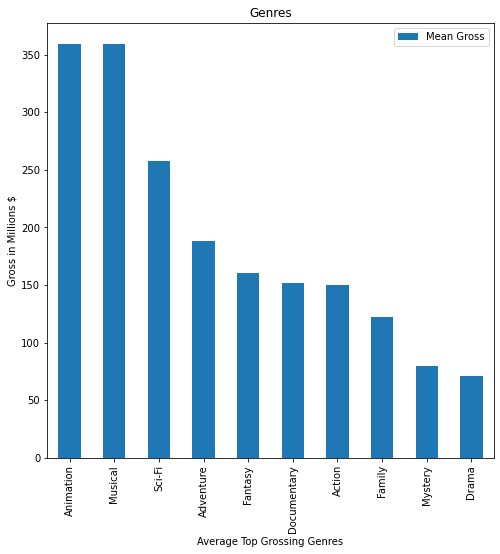

In [151]:
#plotting top 10 genres by average net gross
genres_top10= genres_grouped.head(10)
plt= genres_top10.plot(
    x= "genre", y=("Net_Gross","mean"), kind="bar", figsize = (8,8))
plt.set_xlabel("Average Top Grossing Genres")
plt.set_ylabel("Gross in Millions $")
plt.legend(["Mean Gross"])
plt.set_title("Genres")

Text(0.5, 1.0, 'Top Grossing Genres')

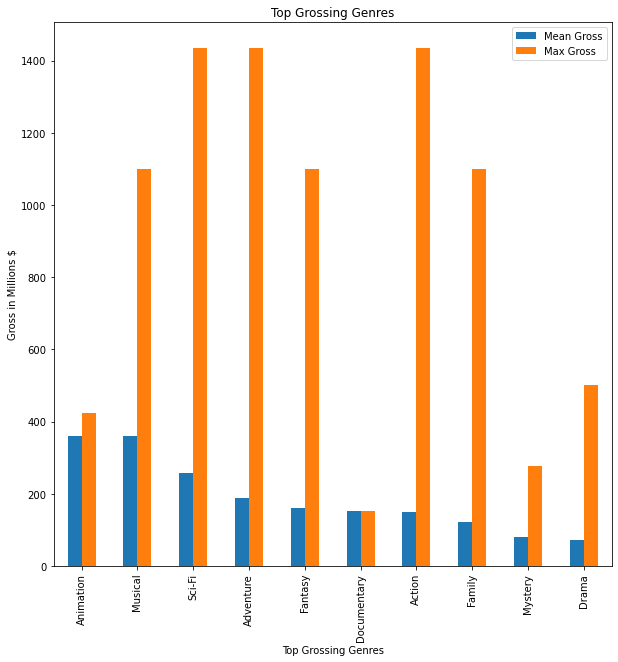

In [152]:
#plotting top 10 genres by average net gross vs which genre has max gross
genres_top10= genres_grouped.head(10)
plt= genres_top10.plot(
    x= "genre", y=("Net_Gross"), kind="bar", figsize = (10,10))
plt.set_xlabel("Top Grossing Genres")
plt.set_ylabel("Gross in Millions $")
plt.legend(["Mean Gross","Max Gross"])
plt.set_title("Top Grossing Genres")

Text(0.5, 1.0, 'Top Grossing Genres')

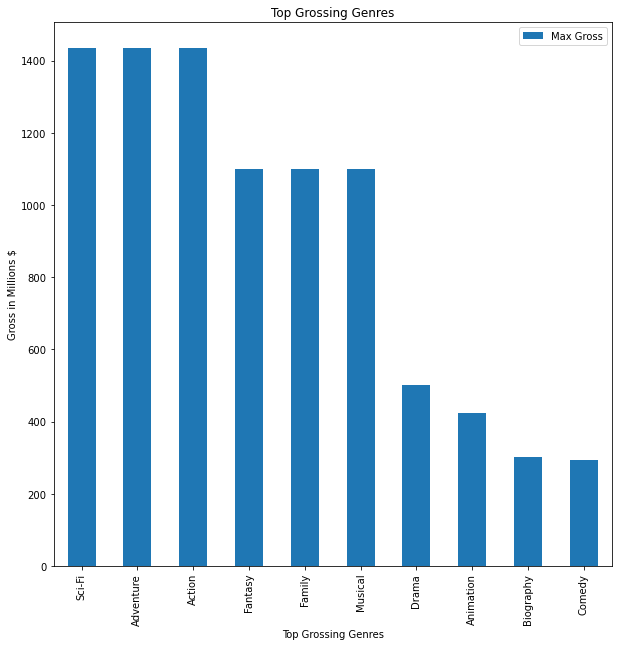

In [153]:
#plotting top 10 highest grossing movies by genre
genres_top10_max= genres_grouped_max.head(10)
plt= genres_top10_max.plot(
    x= "genre", y=("Net_Gross","max"), kind="bar", figsize = (10,10))
plt.set_xlabel("Top Grossing Genres")
plt.set_ylabel("Gross in Millions $")
plt.legend(["Max Gross"])
plt.set_title("Top Grossing Genres")

### Observations

From the above visualizations,we can see that:

Animation has the highest average net gross, however Sci-Fi, Adventure and Action genres have produced films with the single highest max net overall gross.


### Recommendations

Microsoft should produce movies with the genres of Animation, Adventure, and Sci-Fi. Genres can have a big impact on performance at the box office and when looking at the data on genres; Animation, Adventures and Sci-Fi had the highest average net gross earnings across all films.

## Summary of results

1) The top 5 well rated genres based on average  rating are:

- Short

- Documentary

- Game shows

- News

- Biography


2) When it comes average production budget vs average net gross, the average production budget for a film is roughly 34 million dollars and the average net gross earnings is 66 million dollars. The median production budget is roughly 20 million dollars while the median net gross is ~15 million. Looking at the top 100 grossing movies, the average production budget for those films is roughly 159-160 million dollars and the average net gross earnings is 850 million dollars.



3) Runtime and net gross have a weak positive relation meaning that a change in one does not affect the other significantly.

 The average run time is 110 times for the whole dataset.

 The average for the top 100 movies is 110 minutes and when we narrow it even further to the top 15,the avearge is 116   minutesThe recommended run time would be between 110 to 120 minutes
 
 
 4) Animation has the highest average net gross, however Sci-Fi, Adventure and Action genres have produced films with the single highest max net overall gross



## Recommendations to consider

When looking at Microsoft's problem, there different factors to consider from budget, runtime, genres and others that could be explored. As a starting point we can look at the 3 factors of budget, runtime and genre.

### Budget:

Microsoft should plan for a budget of 160 million for production of their films in order to maximize potential for high net gross earnings. While the average budget is around 34 million dollars and does tend to yield an average total net gross around 66-67 million, with a higher budget, there is the potential to produce a higher quality film which could yield a higher net gross.


### Runtime:

Microsoft should plan to produce films with a runtime between 120-130 minutes. The correlation is weak between runtime and films that produce the highest net gross earnings, however when looking at the top 100 higest net grossing films, the average runtime was between 120-130 minutes. The overall average runtime for all films was 107 minutes. Overall runtime may not be as important as other potential factors but may be important to consider modeling after the films with the highest net gross.


### Genres:

Microsoft should produce movies with the genres of Animation, Adventure, and Sci-Fi. Genres can have a big impact on performance at the box office and when looking at the data on genres; Animation, Adventures and Sci-Fi had the highest average net gross earnings across all films.

They should consider average net gross earning rather than average rating when selecting which genre to dive into.

## Conclusion

Finally, Microsoft should keep in mind that the highest worldwide gross revenue registered was USD 1.65 Billion. Therefore, it is important to remain open to the possibility of high revenue generation, and not limit investment opportunities based on past revenue trends.
